In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [9]:
model = Sequential()

In [10]:
#add first convolution layer with the input shape
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same', input_shape=(150, 150, 3)))
#add a Maxpooling layer
model.add(MaxPooling2D((2, 2)))
#add another convolution layer with more hidden units
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))
#add another convolution layer with more hidden units
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
padding='same'))
model.add(MaxPooling2D((2, 2)))

In [11]:
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer=SGD(lr=0.01),loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
# create data generators
train_datagen=ImageDataGenerator(rescale=1.0/255.0,
width_shift_range=0.1,height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# prepare iterators
train_it=train_datagen.flow_from_directory('training_set',class_mode='binary', batch_size=64, target_size=(150, 150))
test_it=test_datagen.flow_from_directory('test_set',class_mode='binary', batch_size=64, target_size=(150, 150))

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [15]:
history=model.fit_generator(train_it,steps_per_epoch=len(train_it),validation_data=test_it,validation_steps=len(test_it),epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
126/126 [==============================] - 505s 4s/step - loss: 0.7173 - accuracy: 0.5598 - val_loss: 0.6625 - val_accuracy: 0.6006
Epoch 2/20
126/126 [==============================] - 328s 3s/step - loss: 0.6667 - accuracy: 0.5906 - val_loss: 0.6472 - val_accuracy: 0.6228
Epoch 3/20
126/126 [==============================] - 334s 3s/step - loss: 0.6527 - accuracy: 0.6209 - val_loss: 0.6666 - val_accuracy: 0.5783
Epoch 4/20
126/126 [==============================] - 326s 3s/step - loss: 0.6376 - accuracy: 0.6400 - val_loss: 0.6172 - val_accuracy: 0.6649
Epoch 5/20
126/126 [==============================] - 328s 3s/step - loss: 0.6228 - accuracy: 0.6497 - val_loss: 0.5975 - val_accuracy: 0.6886
Epoch 6/20
126/126 [==============================] - 326s 3s/step - loss: 0.6098 - accuracy: 0.6707 - val_loss: 0.5818 - val_accuracy: 0.6960
Epoch 7/20
126/126 [==============================] - 327s 3s/step

In [16]:
model.save('cats-vs-dogs.h5')

In [17]:
_,acc=model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
> 76.372


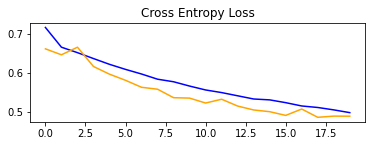

In [18]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')

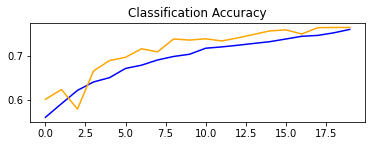

In [19]:
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='test')

In [21]:
import sys
filename = sys.argv[0].split('/')[-1]
pyplot.savefig(filename + '_plot.png')
pyplot.close()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('cat.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)